(Text(0.5, 1.0, 'Gabor Only'), ([], []), ([], []))

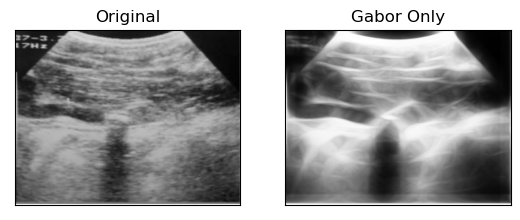

In [1]:
import cv2
import argparse
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread(r'C:\Users\User\cv projects\Kidney-Stone-Detection-main\images\image3.jpg',0)


#sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
#sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
#laplacian = cv2.Laplacian(img,cv2.CV_64F)

def build_filters():
    """ returns a list of kernels in several orientations
    """
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 32):
        params = {'ksize': (ksize, ksize), 'sigma': 2.5, 'theta': theta, 'lambd': 15.0,
                  'gamma': 0.02, 'psi': 0, 'ktype': cv2.CV_32F}
        
        kern = cv2.getGaborKernel(**params)
        kern /= 1.5*kern.sum()
        filters.append((kern, params))
    return filters


def process(img, filters):
    """ returns the img filtered by the filter list
    """
    accum = np.zeros_like(img)
    for kern, params in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum


#main
filters = build_filters()
p = process(img, filters)

equ = cv2.equalizeHist(p)

plt.figure(1)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(equ, cmap='gray')
plt.title('Gabor Only'),plt.xticks([]),plt.yticks([])

#plt.subplot(123), plt.imshow(equ, cmap='gray')
#plt.title('Histogram + Gabor'), plt.xticks([]), plt.yticks([])
